## Getting familiarized with the data

Objectives of this section is to:
1. Find if categorical data exists
2. Find if null points exist 
3. Find correlations between the target variables and the predictor variable
4. Create synthetic features and measure its correlation with the predictor variable
   

In [1]:
import pandas as pd
housing = pd.read_csv("data.csv")
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.288527,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704686,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.211000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.629000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [3]:
correlation_matrix = housing.corr()

# Select the correlation values of the 'MEDV' column with other columns
medv_correlations = correlation_matrix['MEDV'].sort_values(ascending=False)

# Print or display the correlation values
print(medv_correlations)

MEDV       1.000000
RM         0.696768
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


In [4]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
import matplotlib.pyplot as plt

# # Plot histograms for all columns in the DataFrame
# housing.hist(figsize=(15, 12))
# plt.tight_layout()  # Adjust the layout for better appearance
# plt.show()

## Objectives
1. Split the dataframe in train and test set, but include stratified split of CHAS variable (as it is categorical)

In [6]:
from sklearn.model_selection import train_test_split 

# Splitting based on the 'CHAS' column while maintaining the proportion of classes
train_df, test_df = train_test_split(housing, test_size=0.2, stratify=housing['CHAS'], random_state=42)

# Display the shapes of the train and test sets
print("Train set shape:", train_df.shape)
print("Test set shape:", test_df.shape)
train_df.head()

Train set shape: (404, 14)
Test set shape: (102, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0


In [7]:
train_df['CHAS'].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [8]:
test_df['CHAS'].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In [9]:
376/28

13.428571428571429

In [10]:
95/7

13.571428571428571

## Further split the train set to features and labels

In [11]:
train_df_features = train_df.drop("MEDV", axis =1 ) # axis = 1 means perform opeartion on colums, axis = 0 means perform opeartion on rows 
train_df_labels = train_df["MEDV"].copy()
train_df_labels

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
       ... 
155    15.6
423    13.4
98     43.8
455    14.1
216    23.3
Name: MEDV, Length: 404, dtype: float64

## Objective (HANDLING OUTLIERS TO BE DONE)
1. Scatter Plot the train_df to find outliers and handle them

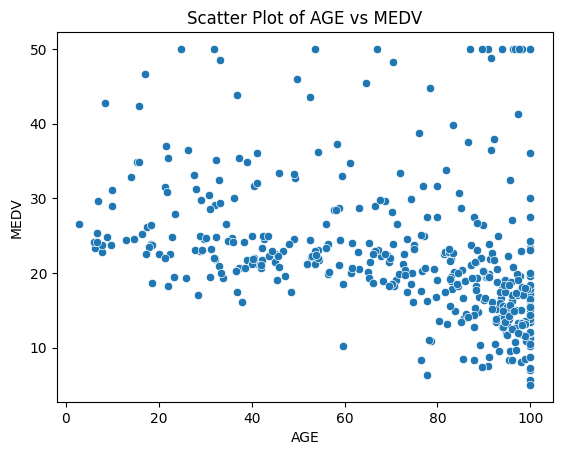

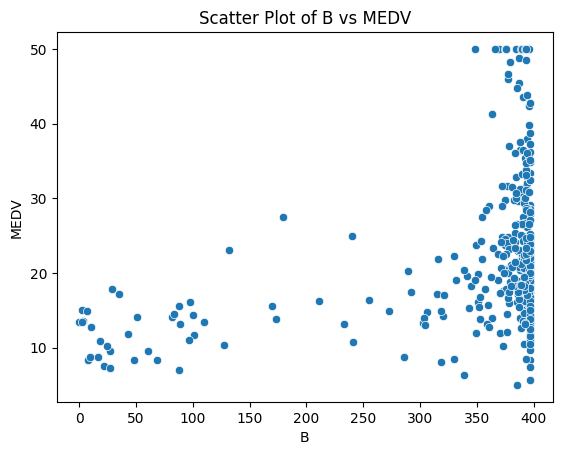

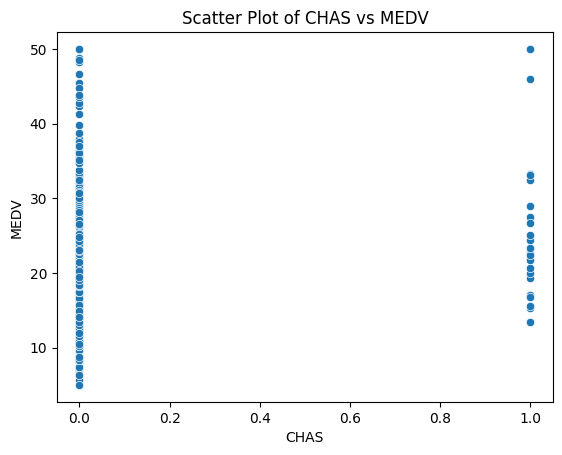

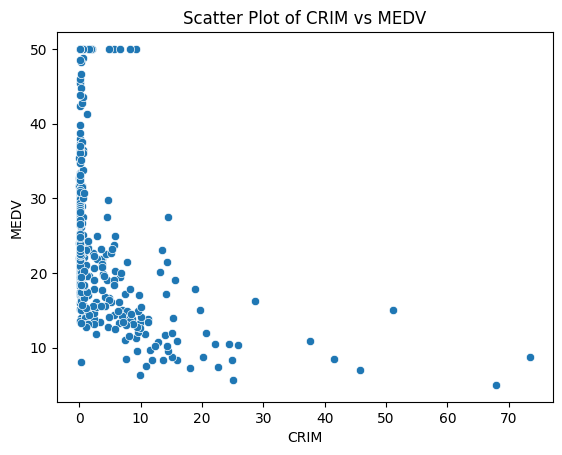

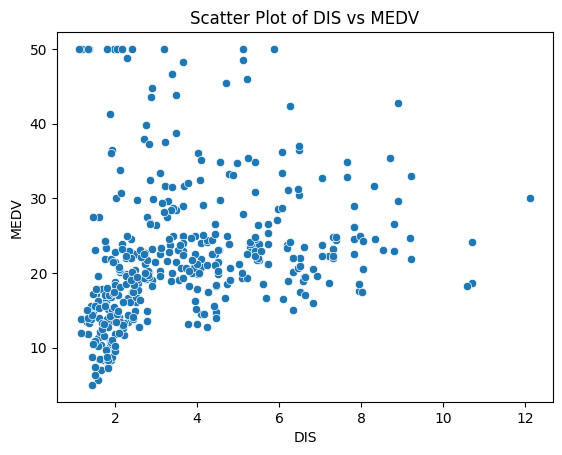

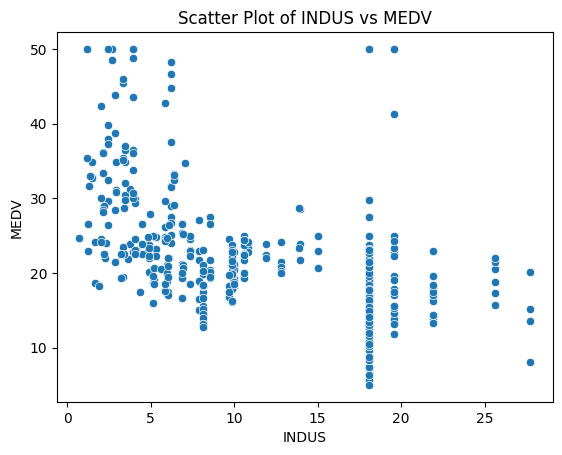

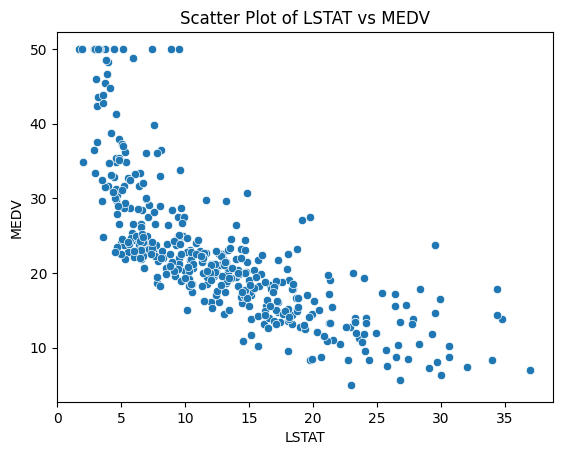

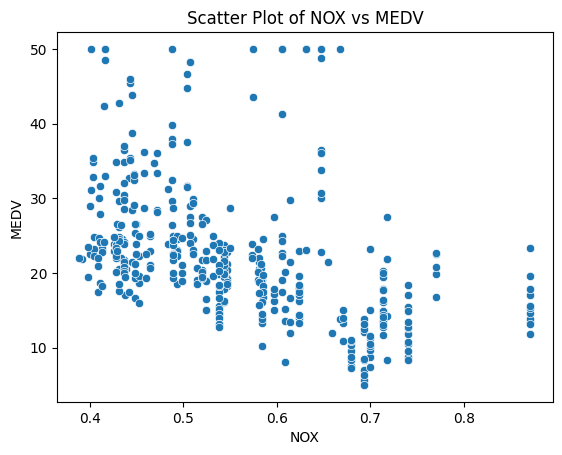

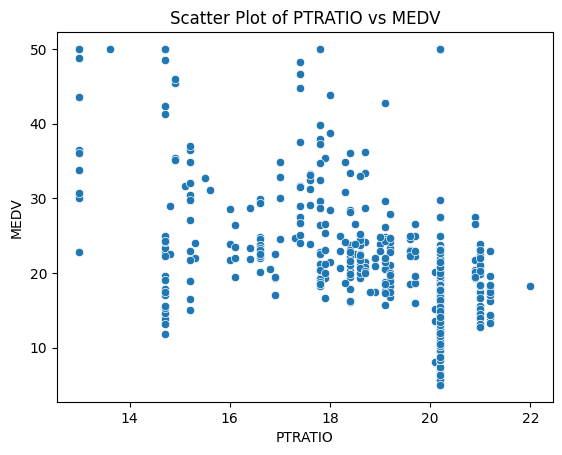

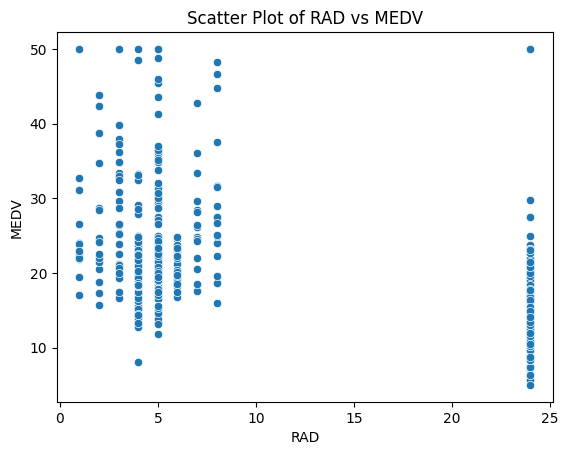

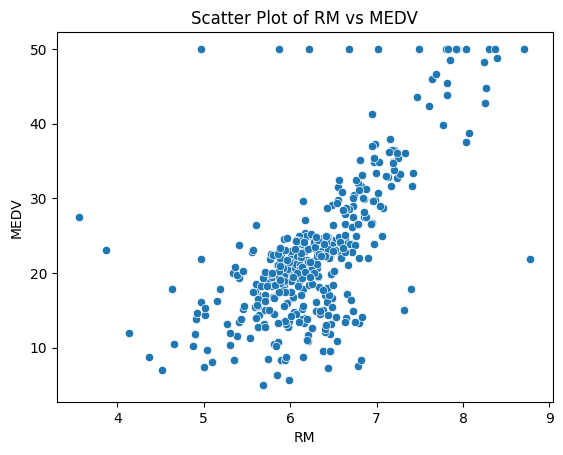

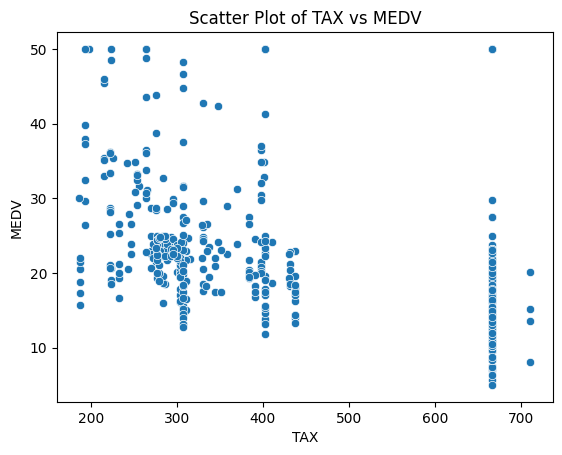

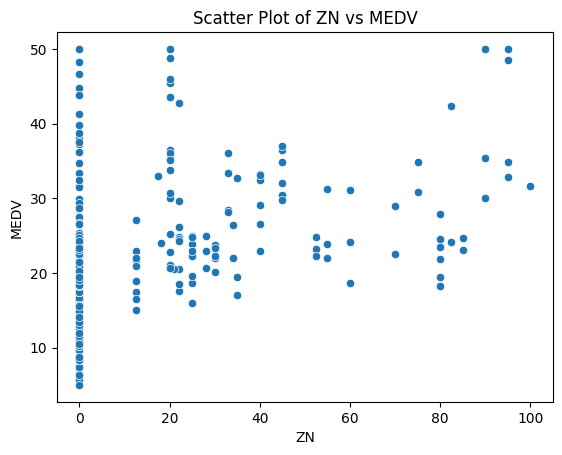

In [12]:
import seaborn as sns

# Assuming you have a DataFrame named 'train_df' and you want to compare attributes against 'MEDV'
# Replace 'train_df' with your actual DataFrame name

# Specify the column names excluding 'MEDV'
columns_to_compare = train_df.columns.difference(['MEDV'])

# Loop through each column and create scatter plots
for column in columns_to_compare:
    sns.scatterplot(x=column, y='MEDV', data=train_df)
    plt.title(f'Scatter Plot of {column} vs MEDV')
    plt.xlabel(column)
    plt.ylabel('MEDV')
    plt.show()

## Objective
1. Create a pipeline with layers
2. define each layer's function
3. Find out if the dataframe follows Gaussian distribution to select Scaling Function 

In [13]:
# Objective 3
import pandas as pd
from scipy import stats

# Assume 'df' is your dataframe.

# Set the significance level (alpha)
alpha = 0.05

# Create lists to store the results for each column
normal_columns = []
non_normal_columns = []

# Loop through all columns in the dataframe
for column_name in train_df.columns:
    # Extract the data from the column
    data = train_df[column_name]

    # Perform the Shapiro-Wilk test
    statistic, p_value = stats.shapiro(data)

    # Check the p-value against the significance level
    if p_value > alpha:
        normal_columns.append(column_name)
    else:
        non_normal_columns.append(column_name)

# Summarize the results
print("Columns that follow a Gaussian distribution:")
for column_name in normal_columns:
    print(f"- {column_name}")

print("\nColumns that do not follow a Gaussian distribution:")
for column_name in non_normal_columns:
    print(f"- {column_name}")


Columns that follow a Gaussian distribution:
- RM

Columns that do not follow a Gaussian distribution:
- CRIM
- ZN
- INDUS
- CHAS
- NOX
- AGE
- DIS
- RAD
- TAX
- PTRATIO
- B
- LSTAT
- MEDV


In [14]:
# Objective 2
from sklearn.base import BaseEstimator, TransformerMixin

class CustomFeatureCreator(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self  # No fitting necessary
    
    def transform(self, X):
        X_copy = X.copy()
        X_copy['TAX_DIV_RM'] = X_copy['TAX'] / X_copy['RM']
        X_copy['ZN_DIV_PTRATIO'] = X_copy['ZN'] / X_copy['PTRATIO']
        X_copy['DIS_DIV_LSTAT'] = X_copy['DIS'] / X_copy['LSTAT']
        return X_copy


In [18]:
def imputed_array_to_df_converter(imputed_array): # This creates a complete train dataframe (without null) by providing column names to values
    imputed_df = pd.DataFrame(imputed_array, columns=train_df_features.columns)
    return imputed_df

def standard_scaled_array_to_df_converter(scaled_array):
    scaled_df = pd.DataFrame(scaled_array, columns=new_df.columns)
    return scaled_df
# new_columns
# new_df = pd.DataFrame(columns=new_columns)
# new_df

In [19]:
# Objective 1
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

# pipeline = Pipeline([
#     ('imputer', SimpleImputer(strategy='mean')), 
#     ('feature_creator', CustomFeatureCreator()),
#     ('scaler', StandardScaler())
# ])

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), # mean is used for a symmetric distribution (of histogram) , while median is used for a skewed distribution
    ('imputed_array_to_df_converter' , FunctionTransformer(imputed_array_to_df_converter)),
    ('CustomFeatureCreator' , CustomFeatureCreator()),
    ('scaler', StandardScaler()), # this function converts the dataframe in Gaussian distribution to some degree
    #('imputed_array_to_df_converter2' , FunctionTransformer(standard_scaled_array_to_df_converter))
])

## Objective 
1. pass the train set (features only) through the pipeline and get the train data ready

In [22]:
pipelined_train_df_features = pipeline.fit_transform(train_df_features)
pipelined_train_df_features
pipelined_train_df_features.shape

(404, 16)

## Selecting a Model

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(pipelined_train_df_features, train_df_labels) # train the model with the pipelined train df features and the label

RandomForestRegressor()

## Checking the predictions manually, a Peek 

In [64]:
some_data = train_df_features.iloc[:5]
some_labels = train_df_labels.iloc[:5]
prepared_data = pipeline.transform(some_data)

model.predict(prepared_data)

array([22.377, 25.592, 16.291, 23.29 , 23.262])

In [51]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [52]:
import numpy as np
from sklearn.metrics import mean_squared_error
train_df_predictions = model.predict(pipelined_train_df_features)
mse = mean_squared_error(train_df_labels, train_df_predictions) # the error between unscaled labels of the train df and the predicted target variables from the pipelined_train_df_features
rmse = np.sqrt(mse)
rmse

1.1721454328885905

## Using Cross Validation (Pattern Evaluation Technique)

In [53]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, pipelined_train_df_features, train_df_labels , scoring = "neg_mean_squared_error", cv = 10)
rmse_scores = np.sqrt(-scores) # as scores are already negative 
# and negative number's sqrt is not removable
# hence we negate it to make it positive

In [54]:
rmse_scores

array([2.88511979, 2.78017851, 4.44549549, 2.80375675, 3.72891222,
       2.68562792, 4.92132794, 3.34408627, 2.9535191 , 3.41594649])

## Creating a score report function

In [55]:
def print_scores(scores):
    print("Scores ", scores)
    print("Mean ", scores.mean())
    print("Std ", scores.std())    

In [57]:
print_scores(rmse_scores)

Scores  [2.88511979 2.78017851 4.44549549 2.80375675 3.72891222 2.68562792
 4.92132794 3.34408627 2.9535191  3.41594649]
Mean  3.3963970495070313
Std  0.7234219083396486


## Record of scores for different Models

1. Linear Regression - mean 4.25

2. Decision Tree mean 4.25 but less std

3. random forest mean 3.39

## Evaluating the Model on test Data

In [60]:
X_test = test_df.drop("MEDV" , axis =1)
Y_test = test_df["MEDV"].copy()

X_test_prepared = pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)

final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)


In [61]:
final_rmse

2.997791733011118

In [59]:
print(final_predictions)
print(list(Y_test))

[24.669 11.364 25.654 21.817 18.155 14.451 20.6   14.508 31.961 40.683
 19.624 12.315 24.547 28.644 19.459 10.859 31.487 14.811 23.889 18.759
 19.981 18.141 18.417 21.727 18.305 31.688 16.026 33.16   8.718 33.33
 22.443 21.317 23.089 10.656 20.779 11.652 42.9   24.522 24.024 42.816
 24.291 29.387 20.245 20.941 19.104 33.752 43.998 20.248 21.26  21.71
 21.547 14.715 22.187 15.185 25.134 33.283 41.257 29.359 20.031 20.896
 46.714  9.692 19.256 25.27  14.346 33.286 19.664 17.972 19.498 34.848
 27.234 22.748 21.249 22.45  35.207 12.647 15.595 19.953 20.768 21.499
 22.443 22.488 13.83  23.331 20.957 21.265 14.389 21.258 21.995 23.055
 18.754 27.348  7.251 26.541 18.662 29.291 19.793 31.306 14.269 26.944
 22.52  20.459]
[16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1, 

## Creating a joblib file (User based)

In [62]:
from joblib import dump, load
dump(model, 'My_Housee_Predictor.joblib')

['My_Housee_Predictor.joblib']